In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


data = np.loadtxt('datasetcontinuous/1.5.txt')

x = data[ : ,0]

y = data[ : ,1]
y = y/np.max(y)

x = x/200
def exponential_func(x, A, B):
    return A * np.exp(B * (x) * 1.5)

popt, pcov = curve_fit(exponential_func, x , y, p0 = [0.5, -0.1])

print(popt)


plt.figure()
plt.plot(x, y, label='Data Points')
# plt.plot(x, exponential_func(x-90, 0.5, -0.1), '->')
plt.plot(x, exponential_func(x, *popt), color='red', label='Exponential Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Exponential Fitting Example')
plt.legend()
plt.grid(True)
plt.show()


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [32]:
# data = np.loadtxt('datasetsfinal/continuous.txt')

# # data = data[data[:, 2] > 0]

# # Plot the first two columns

# plt.plot(data[:,0], data[:,1], label='Column 1 vs Column 2')

# # Normalize the absolute values of the third column
# normalized_col3 = abs(data[:,2]) * 100 / np.max(abs(data[:,2]))
# plt.plot(data[:,0], normalized_col3, label='Normalized |Column 3|')

# # Set the title with the maximum value of the third column
# plt.title(f"current = {np.max(data[:,2])}")

# # Add labels and legend
# plt.xlabel('Column 0')
# plt.ylabel('Values')
# plt.legend()

# # Display the plot
# plt.show()

In [ ]:
data = np.loadtxt('datasetsfinal/1.5.txt')

# data = data[data[:, 2] > 0]

# Plot the first two columns
plt.plot(data[:,0], data[:,1], label='Column 1 vs Column 2')

# Normalize the absolute values of the third column
normalized_col3 = abs(data[:,2]) * 100 / np.max(abs(data[:,2]))
plt.plot(data[:,0], normalized_col3, label='Normalized |Column 3|')

# Set the title with the maximum value of the third column
plt.title(f"current = {np.max(data[:,2])}")

# Add labels and legend
plt.xlabel('Column 0')
plt.ylabel('Values')
plt.legend()

# Display the plot
plt.show()

[ 0.05991493 38.08892138]


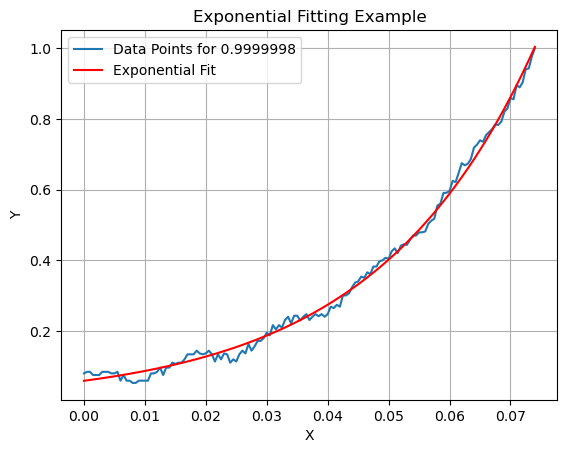

[ 0.07083472 39.24545268]


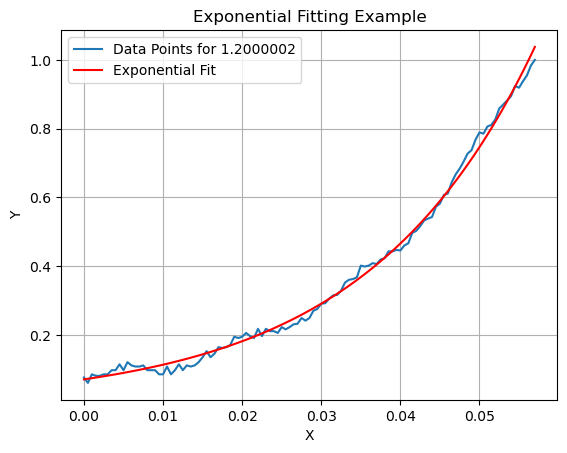

[ 0.05510834 40.74286933]


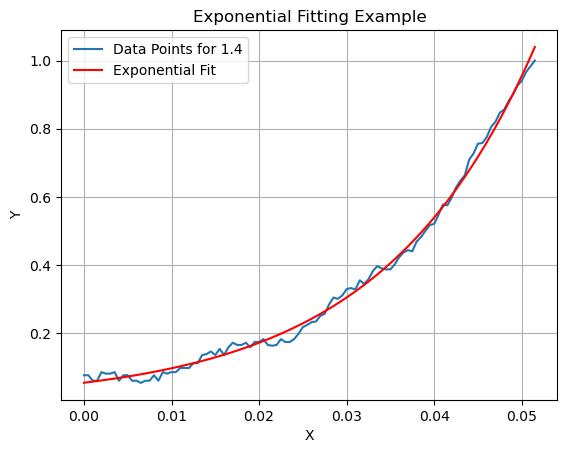

[ 0.12573993 15.20873481]


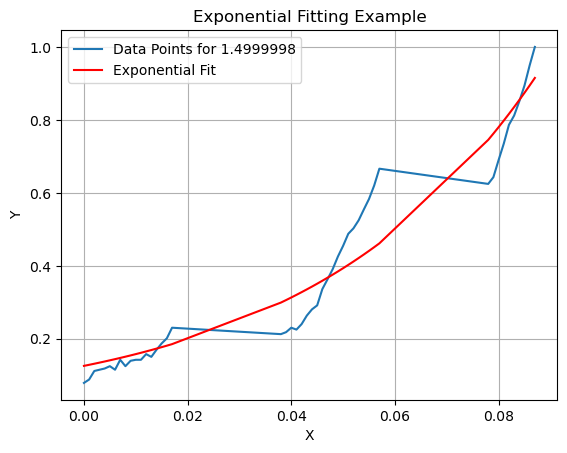

[ 0.06784616 41.06304621]


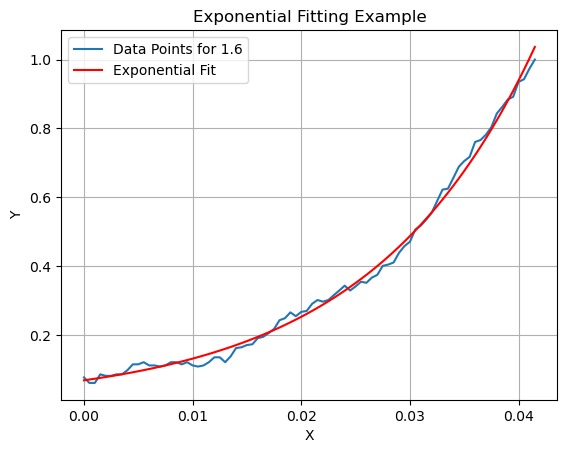

[ 0.08325788 41.6219221 ]


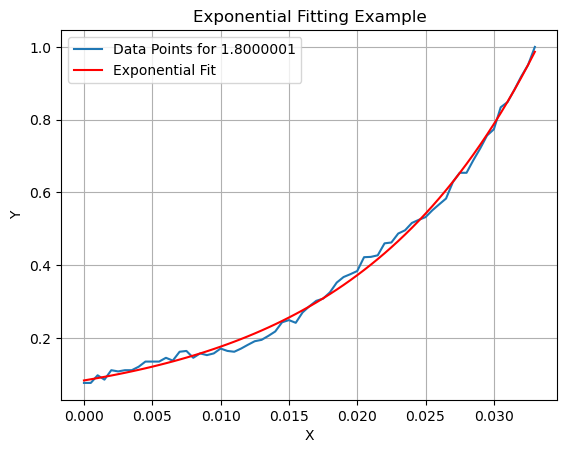

[ 0.08785771 41.56525901]


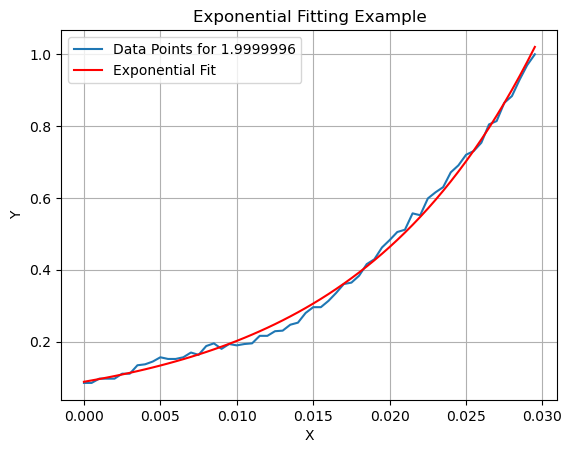

[ 0.05383435 43.51046041]


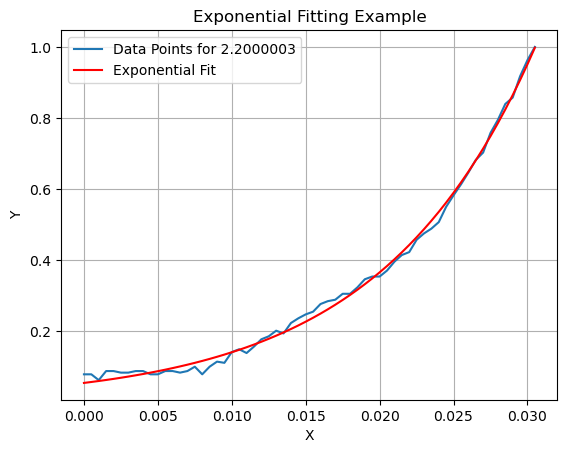

[ 0.0729376  42.36635137]


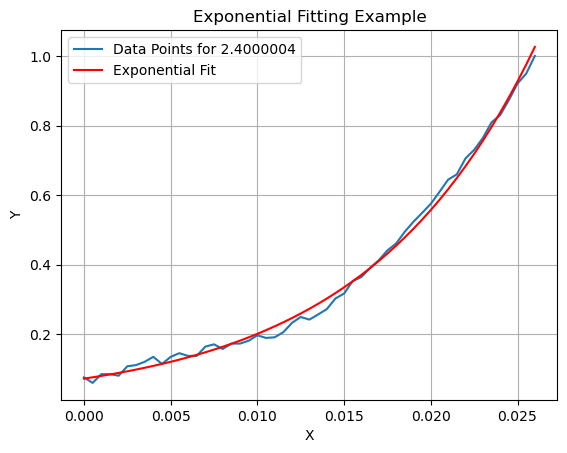

[ 0.06161965 43.13197176]


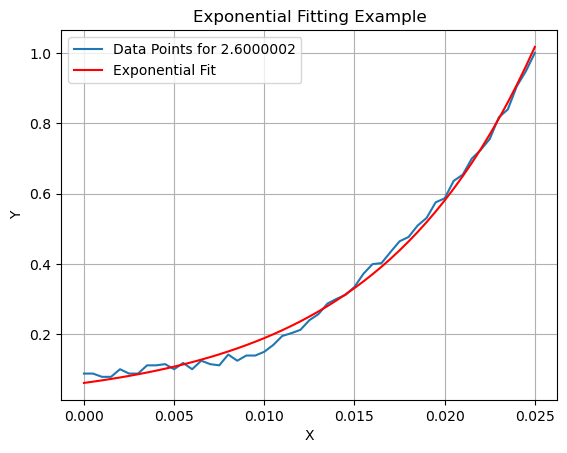

[ 0.09237296 43.55576163]


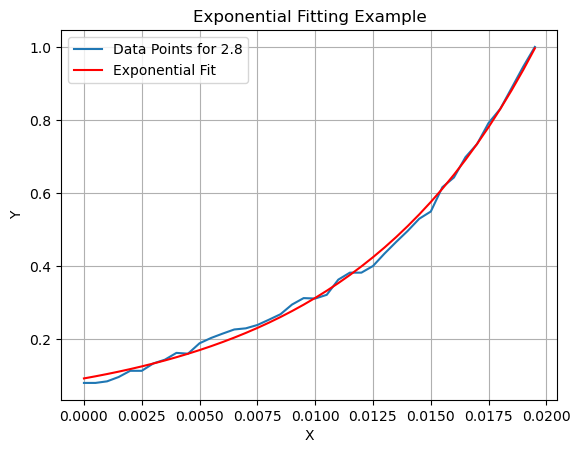

[ 0.0577188  43.56039979]


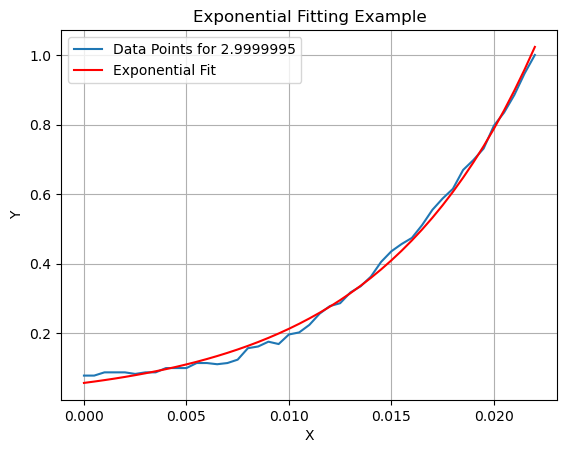

[ 0.09820775 42.82012035]


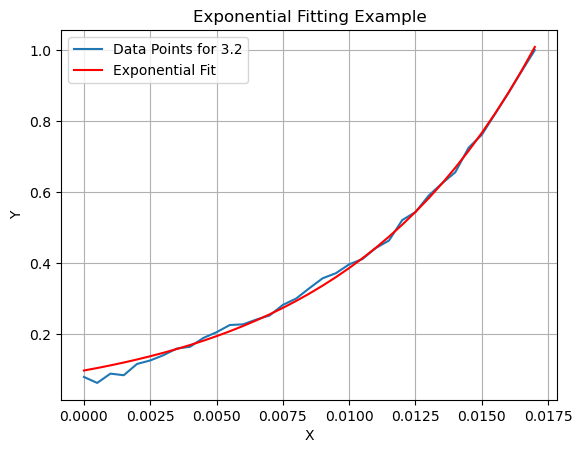

[ 0.10452193 42.75598221]


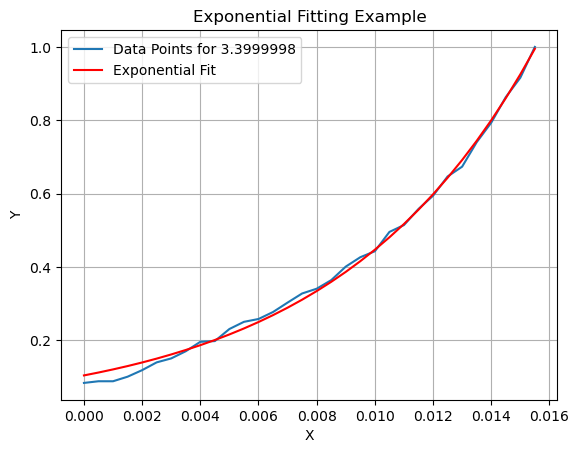

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


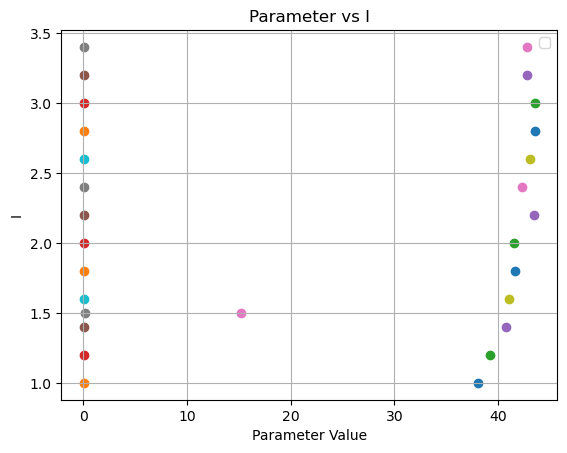

In [22]:
def plot_datasets(directory_path):
    # List all files in the given directory
    dataset_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
    
    I = []
    B = []
    for dataset in dataset_files:
        # Load the data from the file
        data = np.loadtxt(dataset)

        # # data = data[data[:, 2] > 0]
        
        # # Plot the first two columns
        # plt.plot(data[:,0], data[:,1], label='Column 1 vs Column 2')
        
        # # Normalize the absolute values of the third column
        # normalized_col3 = abs(data[:,2]) * 100 / np.max(abs(data[:,2]))
        # plt.plot(data[:,0], normalized_col3, label='Normalized |Column 3|')
        
        # # Set the title with the maximum value of the third column
        # plt.title(f"current = {np.max(data[:,2])}")
        
        # # Add labels and legend
        # plt.xlabel('Column 0')
        # plt.ylabel('Values')
        # plt.legend()
        
        # # Display the plot
        # plt.show()

        x = data[ : ,0]

        y = data[ : ,1]
        y = y/np.max(y)

        x = x/200

        def exponential_func(x, A, B):
            return A * np.exp(B * (x) * np.max(abs(data[:,2]))/1e11)
            # return A * np.exp(B * (x))

        popt, pcov = curve_fit(exponential_func, x , y, p0 = [0.07, 40])

        print(popt)

        I.append(np.max(abs(data[:,2]))/1e11)
        B.append(popt)




        plt.figure()
        plt.plot(x, y, label=f'Data Points for {np.max(abs(data[:,2]))/1e11}')
        # plt.plot(x, exponential_func(x-90, 0.5, -0.1), '->')
        plt.plot(x, exponential_func(x, *popt), color='red', label='Exponential Fit')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Exponential Fitting Example')
        plt.legend()
        plt.grid(True)
        plt.show()


    for i in range(len(I)):
        plt.scatter(B[i][1], I[i])
        plt.scatter(B[i][0], I[i])
    plt.xlabel('Parameter Value')
    plt.ylabel('I')
    plt.title('Parameter vs I')
    plt.legend()
    plt.grid(True)
    plt.show() 

# Example usage
directory_path = "datasetcontinuousfiltered/"  # Replace with your directory path
plot_datasets(directory_path)


